<h1><center> R to Python<br><br>Marketing Research and Analytics<br><br>CHAPTER 4: Relationship between continuous variables</center></h1>

This tutorial aims at providing the python code for the book *R for Marketing Research and Analytics* (Chapman, Christopher N., McDonnell Feit, Elea). We will follow the chapters of the book and provide a Python version of the R code presented in the book.
<br>In this tutorial, we tackle chapter 4 of the book. Please look at the other tutorials for other chapters.

## STEP 1: Importing the required libraries

In [1]:
#Libraries for data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import datetime
from datetime import date
from dateutil.relativedelta import relativedelta
import calendar
from sklearn.feature_selection import chi2
from io import StringIO
import scipy as sp
from scipy import stats
import astropy
from astropy import stats
from statsmodels.distributions.empirical_distribution import ECDF
#Libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
#Below code allows for the graphs to be plotted directly under the coding cell
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 11, 7

## STEP 2: Creating the dataset for customer data
<br>**Description of the dataset**:
This dataset regroups observations from 1,000 customers of a retailer who sells products in store and online. This is a typical dataset for CRM system.
<br><br>**Description of the variables**:
- *age*: age of the customer
- *credit_score*: credit score of a customer
- *email*: whether or not the customer has an email in file
- *distance_to_store*: distance of customer to store
- *online visits*: number of online visits during one year
- *online_trans*: number of online transactions in a year
- *online_spend*: amount spent in a year via online site
- *store_trans*: number of store transactions in a year
- *store_spend*: amount spend in a year in store
- *sat_service*: survey ratings of satisfaction with service
- *sat_selection*: survey ratings of satisfaction with product selection

In [2]:
#Set the number of customers to 1,000
ncust = 1000

In [3]:
#Create an empty dataframe that we will fill afterwards
columns_names=['age', 'credit_score', 'email', 'distance_to_store', 'online_visits', 
               'online_trans', 'online_spend', 'store_trans', 'store_spend', 
               'sat_service', 'sat_selection']
cust_df=pd.DataFrame(columns=columns_names)

In [4]:
#Simulate the age variable with a normal distribution
rnd.seed(12)

<font color=blue>**The Maths behind it**</font>: **Normal distribution**
<br>A normal distribution, sometimes called the bell curve, is a distribution that presents the following properties:
- Mean, median and mode of the distribution coincide
- Curve of the distribution is bell-shape and symmetrical around the mean
- total area under the curve is 1
- exactly half of the values are to the left of the center and other half to the right

If the random variable X follows a normal distribution with mean $\mu$ and variance $\sigma^{2}$, we write $X \sim \mathcal{N}(\mu,\,\sigma^{2})$. 
<br>The **PDF of the normal distribution** is defined as follows:
$$
\begin{equation*}
f(x) = \frac{e^{-\frac{{x-\mu}^2}{2\sigma^2}}}{\sigma\sqrt{2\pi}}
\end{equation*}$$
<br>The case where $\mu = 0$ and $\sigma=1$ is called **Standard Normal Distribution**. The PDF is then defined as:
$$
\begin{equation*}
f(x) = \frac{e^{-\frac{{x}^2}{2}}}{\sqrt{2\pi}}
\end{equation*}$$
Below is an illustraton of the PDF of a standard normal distribution:
<img src="normalstandard.jpg" width="500">
<br>*To go further*: http://mathworld.wolfram.com/NormalDistribution.html or http://www.statisticshowto.com/probability-and-statistics/normal-distributions/

<font color=red>R code</font>: *Normal distribution*
<br>$rnorm(n=ncust,\,mean=35,\,sd=5)$

In [5]:
#Age variable simulation in Python with mean=35 and std=5
cust_df['age']=np.random.normal(35, 5, ncust)

<font color=green>**Cracking the code**</font>: **$np.random.normal$**
<br>This function draws samples from a normal (Gaussian) distribution.
<br>**Syntax**: $np.random.normal(loc=mean,\,scale=std,\,size=output\,size)$
<br>**Reference**: https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.normal.html

In [7]:
#Simulate credit score with a normal distribution and depending on age
cust_df['credit_score']=np.random.normal(3*cust_df['age']+620,50, ncust)

In [8]:
#Simulate email registration with random.choice
cust_df['email']=np.random.choice(['yes', 'no'], size=ncust, replace=True, p=[0.8, 0.2])

In [9]:
#Simulate distance to store that is assumed to follow the exponential of a normal distribution

<font color=blue>**The Maths behind it**</font>: **Lognormal distribution**
<br>A lognormal distribution is a continuous probability distribution of a random variable whose logarithm is normally distributed. Hence, if the random variable $X$ is log-normally distributed, then $Y=\ln(X)$ is normally distributed. Likewise, if $Y$ has a normal distribution, then the exponential function of $Y$, $X=exp(Y)$, has a log-normal distribution.
<br>*Note*: A random variable which is log-normally distributed takes only positive real values.
<br>*To go further*: http://mathworld.wolfram.com/LogNormalDistribution.html

<font color=red>R code</font>: *Lognormal distribution*
<br>*Option 1*: $exp(rnorm(n=ncust,\,mean=2,\,sd=1.2))$
<br>*Option 2*: $rlnorm(n=ncust,\,meanlog,\,sdlog)$

In [9]:
#Python code
cust_df['distance_to_store']=np.exp(np.random.normal(2, 1.2, ncust))

In [10]:
#Get a first overview of the incomplete dataframe
cust_df.describe()

,age,credit_score,distance_to_store
count,1000.000000,1000.000000,1000.000000
mean,35.271148,726.856941,15.387463
std,4.883513,52.016416,29.943631
min,22.081930,542.587611,0.176080
25%,31.901548,691.492083,3.229713
50%,35.260754,728.779388,7.355221
75%,38.435842,762.238406,16.044359
max,52.606995,875.578610,606.335148


In [ ]:
#Simulating online and in-store sales data

In [ ]:
#Online visits simulated using a negative binomial distribution

<font color=blue>**The Maths behind it**</font>: **Negative Binomial distribution**
<br>A negative binomial distribution is a discrete probability distribution in which $X$, the random variable, represents the number of trials r before a success. This is the main difference with the binomial distribution: with a regular binomial distribution we are looking at the number of successes. On the contrary, with a negative binomial distribution, this is the number of failures that is being counted (e.g. how many cards it takes to pick two aces).
<br>*To go further*: http://mathworld.wolfram.com/NegativeBinomialDistribution.html

<font color=red>R code</font>: *Negative binomial distribution*
<br>$rnbinom(ncust,\, size=0.3, \, mu=15+ifelse(cust{\_}df\$email==``yes``, 15,0)-0.7*(cust{\_}df\$age-median(cust{\_}df\$age)))$
<br>mu = mean of the negative binomial, size sets the variation (degree of dispersion) of the sample 

In [11]:
#Python code: mu in R code needs to be transformed into a probability, so we do the calculation below
mu=15+np.where(cust_df['email']=='yes', 15, 0)-0.7*(cust_df['age']-cust_df['age'].median())
size=0.3
p=size/(size+mu)
cust_df['online_visits']=np.random.negative_binomial(size, p, ncust)

<font color=green>**Cracking the code**</font>: **$np.random.negative{\_}binomial$**
<br>This function draws samples from a negative binomial distribution.
<br>**Syntax**: $np.random.negative{\_}binomial(n, p, size)$, $n =$ # of trials, $p =$ probability of success
<br>**Reference**: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.negative_binomial.html

In [12]:
#Online transaction follows a binomial distribution with 30% chance of placing an order
cust_df['online_trans']=np.random.binomial(cust_df['online_visits'],0.3,ncust)

In [13]:
#Online spend modeled with a lognormal distribution
cust_df['online_spend']=np.exp(np.random.normal(3, 0.1, ncust))*cust_df['online_trans']

In [14]:
#Store transaction follows a negative binomial distribution
mu_st=3/np.sqrt(cust_df['distance_to_store'])
size_st=5
p_st=size_st/(size_st+mu_st)
cust_df['store_trans']=np.random.negative_binomial(size_st, p_st, ncust)

In [15]:
#Store spend modeled by lognormal distribution
cust_df['store_spend']=np.exp(np.random.normal(3.5, 0.4, ncust))*cust_df['store_trans']

In [16]:
#Simulating satisfaction survey response
sat_overall=np.random.normal(3.1, 0.7, ncust)

In [16]:
#Overall satisfaction is a psychological construct non observable

In [ ]:
#Divide it between satisfaction for service and satisfaction for selection
#Convert the continuous random values to discrete integers

<font color=red>R code</font>: *Floor function*
<br>$floor(sat{\_}overall + rnorm(ncust,\, mean=0.5,\,sd=0.4))$

In [17]:
#Python code
sat_service=np.floor(sat_overall+np.random.normal(0.5, 0.4, ncust))
sat_selection=np.floor(sat_overall + np.random.normal(-0.2, 0.6, ncust))

<font color=green>**Cracking the code**</font>: **$np.floor$**
<br>This function returns the floor of the input, element wise. The floor of a scalar $x$ is the largest integer $i$, such that $i<=x$.
<br>**Syntax**: $np.floor(input)$ 
<br>**Reference**: https://docs.scipy.org/doc/numpy/reference/generated/numpy.floor.html

In [21]:
#Describe the satisfaction variables

In [18]:
sp.stats.describe(sat_service)

DescribeResult(nobs=1000L, minmax=(0.0, 6.0), mean=3.093, variance=0.7310820820820821, skewness=-0.05378776166300434, kurtosis=0.06988118009948252)

In [19]:
sp.stats.describe(sat_selection)

DescribeResult(nobs=1000L, minmax=(0.0, 5.0), mean=2.406, variance=0.9701341341341341, skewness=-0.03287393616492822, kurtosis=-0.14328987829470696)

Values range from -1.0 to 6.0. However, a typical satisfaction item might be given on a 1-5 scale. We will convert values inferior to 1 to 1 and values greater than 5 to 5.

In [20]:
sat_service[sat_service > 5]=5
sat_service[sat_service < 1]=1
sat_selection[sat_selection > 5]=5
sat_selection[sat_selection < 1]=1

In [26]:
sp.stats.describe(sat_service)

DescribeResult(nobs=1000L, minmax=(1.0, 5.0), mean=3.102, variance=0.7022982982982983, skewness=0.0004261195086830656, kurtosis=-0.3021262100236872)

In [27]:
sp.stats.describe(sat_selection)

DescribeResult(nobs=1000L, minmax=(1.0, 5.0), mean=2.386, variance=0.85585985985986, skewness=0.21046631758922776, kurtosis=-0.5588799525983141)

In [34]:
#Simulating non response data as not everyone answer the survey

<font color=red>R code</font>: *NA: missing values*
<br>R's built-in constant for missing value is NA

In [21]:
#Python code
no_response=np.random.binomial(1, cust_df['age']/100, ncust).astype(bool)
sat_service[no_response]=np.nan
sat_selection[no_response]=np.nan
cust_df['sat_service']=sat_service
cust_df['sat_selection']=sat_selection

<font color=green>**Cracking the code**</font>: **$np.nan$**
<br>Special value for specifying missing values in Python.
<br>**Syntax**: $np.nan$ 
<br>**Reference**: https://docs.scipy.org/doc/numpy-1.13.0/user/misc.html

In [23]:
#Export the dataset and save it
cust_df.to_csv('cust_df.csv', index=False)

## STEP 3: Exploring associations between variables with Scatterplots

In [22]:
#Review the structure of the dataset
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
age                  1000 non-null float64
credit_score         1000 non-null float64
email                1000 non-null object
distance_to_store    1000 non-null float64
online_visits        1000 non-null int32
online_trans         1000 non-null int32
online_spend         1000 non-null float64
store_trans          1000 non-null int32
store_spend          1000 non-null float64
sat_service          630 non-null float64
sat_selection        630 non-null float64
dtypes: float64(7), int32(3), object(1)
memory usage: 74.3+ KB


### Basic scatterplot

<font color=red>R code</font>: *plot()*
<br>$plot(x=cust{\_}df\$age, \, y=cust{\_}df\$credit{\_}score)$

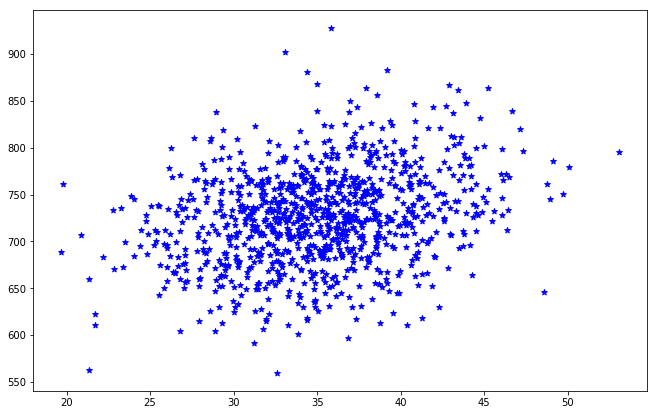

In [35]:
#Python code
plt.scatter(cust_df['age'], cust_df['credit_score'], 
            marker='*', 
            color='b')

<font color=green>**Cracking the code**</font>: **$plt.scatter$**
<br>Create a scatter plot of $y$ vs $x$ with varying marker size and/or color.
<br>**Syntax**: $plt.scatter(x,\,y,\,marker,\,c=color)$ 
<br>**Reference**: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html

### Adding horizontal and vertical lines to a basic scatterplot

<font color=red>R code</font>: *abline*
<br>Create vertical and/or horizontal line plots using the abline function.
<br>$abline(h=mean(cust{\_}df\$credit{\_}score),\, col=``dark blue``,\,lty=``dotted``)$, h means horizontal line. In the case of vertical line, use v

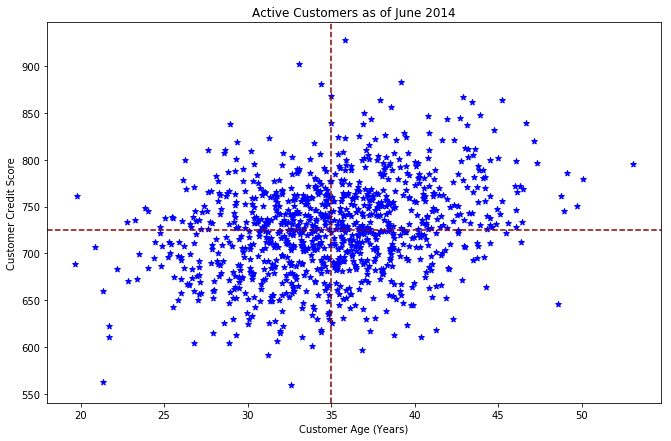

In [36]:
#Python code
plt.scatter(cust_df['age'], cust_df['credit_score'], 
            marker='*', 
            color='b')
#plot the mean of credit=score 
plt.axhline(np.mean(cust_df['credit_score']), 
      color='darkred',
      linestyle='--')
#plot the mean of age
plt.axvline(np.mean(cust_df['age']),
            color='darkred',
            linestyle='--')
plt.title("Active Customers as of June 2014")
plt.xlabel("Customer Age (Years)")
plt.ylabel("Customer Credit Score")
plt.show()

<font color=green>**Cracking the code**</font>: **$plt.axhline\,and\,plt.axvline$**
<br>Add a vertical (plt.axvline) or an horizontal (axhline) line to the plot.
<br>**Syntax**: $plt.axvline(x,\,color,\,linestyle)$ or $axhline(x,\,color,\,linestyle)$ 
<br>**Reference**: https://stackoverflow.com/questions/24988448/how-to-draw-vertical-lines-on-a-given-plot-in-matplotlib

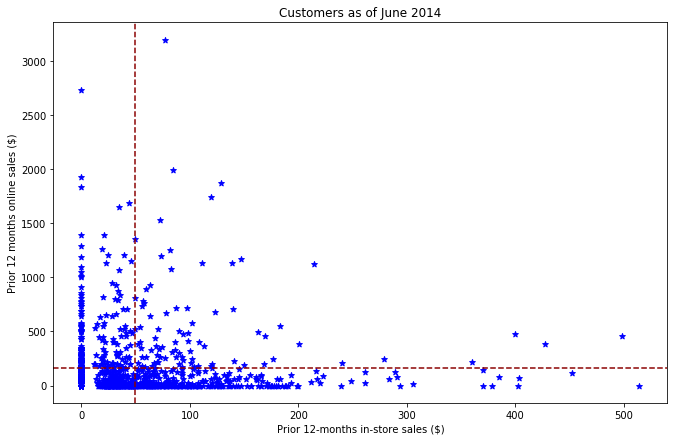

In [38]:
#Look at online and store spend
plt.scatter(cust_df['store_spend'], cust_df['online_spend'],
            marker='*',
            color='blue')
plt.title("Customers as of June 2014")
plt.xlabel("Prior 12-months in-store sales ($)")
plt.ylabel("Prior 12 months online sales ($)")
#plot the mean of online sales
plt.axhline(np.mean(cust_df['online_spend']), 
      color='darkred',
      linestyle='--')
#plot the mean of store sales
plt.axvline(np.mean(cust_df['store_spend']),
            color='darkred',
            linestyle='--')
plt.show()

Looking at the graph, we see that sales data are heavely skewed so it does not give a good insight on relationship
Let's take a look at each individual variable with a histogram.

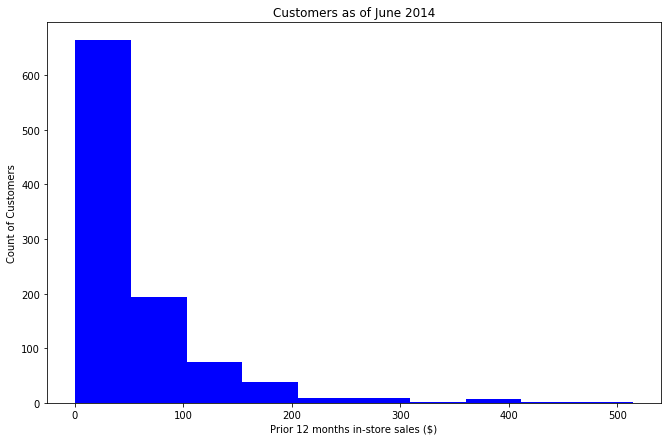

In [39]:
#Store spend
plt.hist(cust_df['store_spend'],
         color='blue',
         )
plt.title("Customers as of June 2014")
plt.xlabel("Prior 12 months in-store sales ($)")
plt.ylabel("Count of Customers")
plt.show()

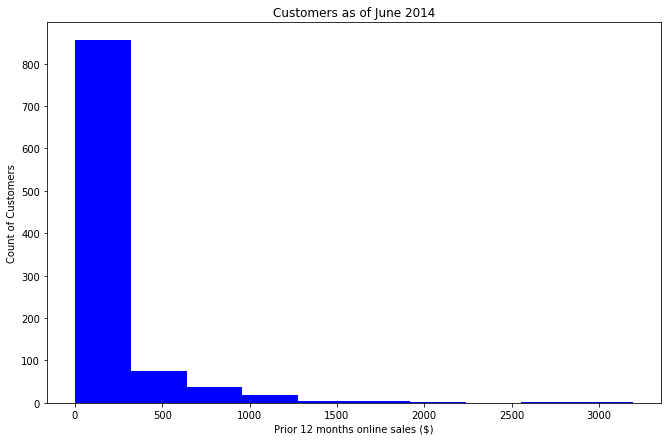

In [40]:
#Online spend
plt.hist(cust_df['online_spend'],
         color='blue',
         )
plt.title("Customers as of June 2014")
plt.xlabel("Prior 12 months online sales ($)")
plt.ylabel("Count of Customers")
plt.show()

A usual solution to get a better view of the relationship between skewed variables is to plot on a log scale.

### Log scale plot

<font color=red>R code</font>: *Log scale plot*
$$
plot(cust{\_}df\$store{\_}spend + 1,\\
     cust{\_}df\$online{\_}spend + 1,\\
     \> main = "Customers \, as \,of \,June \,2014",\\
     \> xlab = "Prior \,12 \,Months \,in-store\,sales",\\
     \> ylab = "Prior\,12\,Months\,online\,sales",\\
      log=``xy``,\\
      col = "lightblue",\\
      cex=0.7)
$$

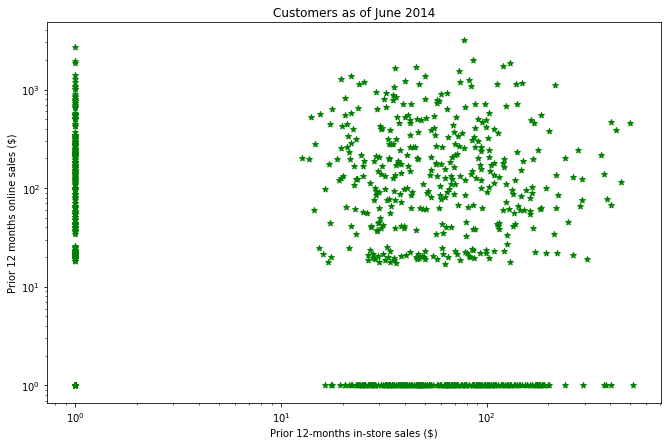

In [42]:
#Python code
fig=plt.figure()
ax=plt.gca()
ax.scatter(cust_df['store_spend']+1, cust_df['online_spend']+1,
           color='green',
           marker='*')
ax.set_yscale('log')
ax.set_xscale('log')
plt.title("Customers as of June 2014")
plt.xlabel("Prior 12-months in-store sales ($)")
plt.ylabel("Prior 12 months online sales ($)")
plt.show()

<font color=green>**Cracking the code**</font>: **Log scale plot**
<br>Set the axis of the plot to log. You can set only one axis or both axis.
<br>**Syntax**: $ax.set{\_}yscale('log')$ and $ax.set{\_}xscale('log')$
<br>**Reference**: https://matplotlib.org/2.0.0/examples/pylab_examples/log_demo.html

### Combining plots in a single graphics object

<font color=red>R code</font>: *Log scale plot*
<br>$par(mfrow=c(2,2))$
<br>$plot(cust{\_}df\$distance{\_}to{\_}store,\,cust{\_}df\$store{\_}spend,\,main="store")$
<br>$plot(cust{\_}df\$distance{\_}to{\_}store,\,cust{\_}df\$online{\_}spend,\,main="online")$
<br>$plot(cust{\_}df\$distance{\_}to{\_}store,\,cust{\_}df\$store{\_}spend+1,\,log="xy",\,main="store, log")$
<br>$plot(cust{\_}df\$distance{\_}to{\_}store,\,cust{\_}df\$online{\_}spend+1,\,log="xy",\,main="online, log")$

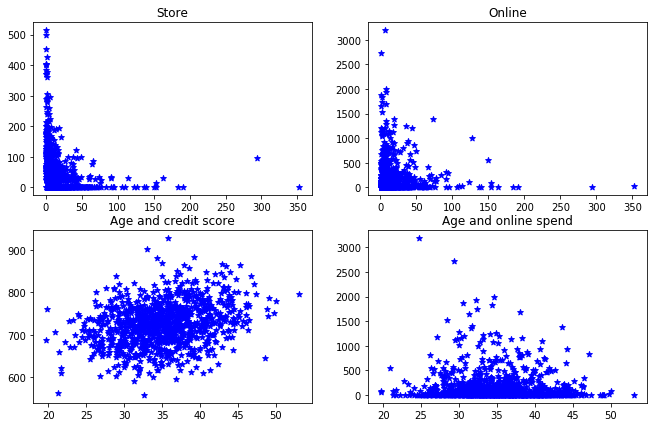

In [43]:
#Python code: a little tedious compared to R
plt.subplot(2, 2, 1)
plt.title("Store")
plt.scatter(cust_df["distance_to_store"], cust_df["store_spend"], 
            color='blue',
            marker='*')
plt.subplot(2, 2, 2)
plt.title("Online")
plt.scatter(cust_df["distance_to_store"], cust_df["online_spend"], 
            color='blue',
            marker='*')
plt.subplot(2,2,3)
plt.title("Age and credit score")
plt.scatter(cust_df["age"], cust_df["credit_score"], 
            color='blue',
            marker='*')
plt.subplot(2,2,4)
plt.title("Age and online spend")
plt.scatter(cust_df["age"], cust_df["online_spend"], 
            color='blue',
            marker='*')

<font color=green>**Cracking the code**</font>: **Subplot**
<br>Return a subplot axes at the given grid position.
<br>**Syntax**: $plt.subplot(nrows,\,ncols,\,grid\,position)$
<br>**Reference**: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html 

### Pairplots

<font color=red>R code</font>: *Pairplots*
<br>$pairs(cust{\_}df[,c(2:10)])$

In [50]:
#Python code
sns.pairplot(cust_df, vars=["age", "credit_score", "email", "distance_to_store", 
                            "online_visits", "online_trans", "online_spend", "store_spend"])

<font color=green>**Cracking the code**</font>: **Pairplot**
<br>Plot pairwise relationships in a dataset. Possible to show only a subset of variables or plot different variables on the rows and columns.
<br>**Syntax**: $sns.pairplot(data,\,hue,\,palette)$
<br>**Reference**: https://seaborn.pydata.org/generated/seaborn.pairplot.html

### Covariance

<font color=red>R code</font>: *Covariance*
<br>$cov(cust{\_}df\$age,\,cust{\_}df\$credit{\_}score)$

<font color=blue>**The Maths behind it**</font>: **Covariance**
<br>Measure of how much two random variables vary together. It is similar to the variance with the difference that variance is a **single** variable metric while covariance tells you how **two** variables interact with each other.
<br>The **covariance formula** is given as below:
$$Cov(X,\,Y)=\mathbb{E}[ \,(X-\mathbb{E}[ \,X] \,)(Y-\mathbb{E}[ \,Y] \,)] \,\\
\,\,\,=\mathbb{E}[ \,XY] \,-\mathbb{E}[ \,X] \,\mathbb{E}[ \,Y] \,$$
<br>*To go further*: http://mathworld.wolfram.com/Covariance.html

In [48]:
#Python code
np.cov(cust_df["age"], cust_df["credit_score"])

array([[  26.15598285,   72.44772842],
       [  72.44772842, 2563.22527795]])

<font color=green>**Cracking the code**</font>: **np.cov**
<br>Estimate a covariance matrix, given data and weights
<br>**Syntax**: $np.cov(array1,\,array2)$
<br>**Reference**: https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html

### Correlation

<font color=red>R code</font>: *Correlation*
<br>$cor(cust{\_}df\$age,\,cust{\_}df\$credit{\_}score)$

<font color=blue>**The Maths behind it**</font>: **Correlation, Pearson correlation coefficient**
<br>Correlation coefficients are used to find how strong a relationship is between data. The formulas return a value between -1 and 1 where:
- 1 indicates a strong positive relationship
- -1 indicates a strong negative relationship
- 0 indicates no relationship at all

**Pearson's correlation coefficient**: *"Can I draw a line graph to represent the data?"*
<br>It shows the linear relationship between two sets of data. It can be represented by the Greek letter $\rho$ or by the letter $r$.
$$\rho_{X,Y}=\frac{\operatorname{cov}(X,Y)}{\sigma_{X}\sigma_{Y}},$$
where $\operatorname{cov}$ is the covariance, $\sigma_{X}$ is the standard deviation of X and $\sigma_{Y}$ is the standard deviation of Y.
<br>*To go further*: http://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/

In [46]:
#Correlation coefficient in Python: r pearson coeff
np.corrcoef(cust_df['age'], cust_df['credit_score'])

array([[1.        , 0.27979881],
       [0.27979881, 1.        ]])

<font color=green>**Cracking the code**</font>: **np.corrcoef**
<br>Returns the Pearson product-moment correlation coefficients.
<br>**Syntax**: $np.corrcoef(x,\,y)$
<br>**Reference**: https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html

In [47]:
#Returns the pearson correlation coeff and p-value for testing non correlation
sp.stats.pearsonr(cust_df['age'], cust_df['credit_score'])

(0.2797988094143982, 1.9214184894106491e-19)

<font color=green>**Cracking the code**</font>: **scipy.stats.pearsonr**
<br>Calculate a Pearson correlation coefficient and the p-value for testing non-correlation.
<br>**Syntax**: $sp.stats.pearson(x,\,y)$
<br>**Reference**: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html